In [1]:
from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

num_instances = len(digits.images)

print num_instances, "number of instances"

/Users/don/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


1797 number of instances


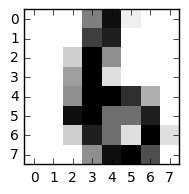

In [2]:
# Display an example digit
plt.figure(1, figsize=(2, 2))
plt.imshow(digits.images[16], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
# This is the internal representation of an image
print digits.images[16]

[[  0.   0.   0.   8.  15.   1.   0.   0.]
 [  0.   0.   0.  12.  14.   0.   0.   0.]
 [  0.   0.   3.  16.   7.   0.   0.   0.]
 [  0.   0.   6.  16.   2.   0.   0.   0.]
 [  0.   0.   7.  16.  16.  13.   5.   0.]
 [  0.   0.  15.  16.   9.   9.  14.   0.]
 [  0.   0.   3.  14.   9.   2.  16.   2.]
 [  0.   0.   0.   7.  15.  16.  11.   0.]]


In [4]:
# This is the data flattened (so each image is a feature)
digits_flat = digits.images.reshape((num_instances, -1))
print digits_flat[16]

[  0.   0.   0.   8.  15.   1.   0.   0.   0.   0.   0.  12.  14.   0.   0.
   0.   0.   0.   3.  16.   7.   0.   0.   0.   0.   0.   6.  16.   2.   0.
   0.   0.   0.   0.   7.  16.  16.  13.   5.   0.   0.   0.  15.  16.   9.
   9.  14.   0.   0.   0.   3.  14.   9.   2.  16.   2.   0.   0.   0.   7.
  15.  16.  11.   0.]


In [5]:
# Split up the data sets into a test and training set
split_point = 110

digits_flat_train, digits_flat_test = digits_flat[:-split_point], digits_flat[-split_point:]
digits_lbls_train, digits_lbls_test = digits.target[:-split_point], digits.target[-split_point:]

In [6]:
# Do the training

import sklearn
from sklearn import tree

# Instatiate the classifier
# EXERCISE: TRY CHANGING THIS AND PLAYING WITH PARAMETERS
clf_dt = tree.DecisionTreeClassifier()   

# fit
clf_dt = clf_dt.fit(digits_flat_train, digits_lbls_train)

In [7]:
# Score it to see how we do on the other half
print 'Accuracy:', clf_dt.score(digits_flat_test, digits_lbls_test)

Accuracy: 0.836363636364


In [8]:
# Build a confusion matrix
predictions = clf_dt.predict(digits_flat_test)

sklearn.metrics.confusion_matrix(digits_lbls_test, predictions)

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  1,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  8,  1,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  1,  4,  1,  1,  0,  0,  2,  2],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  7,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 11]])

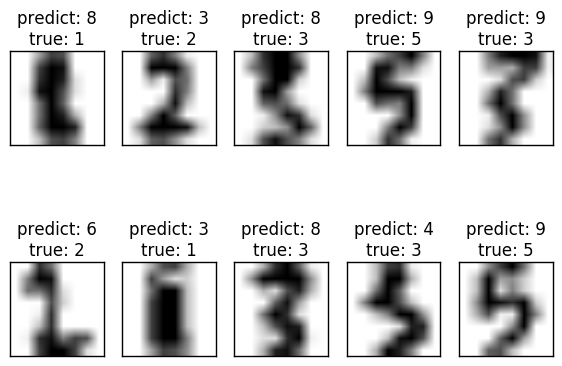

In [9]:
# Plot some incorrect predictions

plt.clf()
f = plt.figure(figsize=(7, 5))
count = 0
for idx, (actual, prediction) in list(enumerate(zip(digits_lbls_test, predictions))):
    if actual == prediction:
        continue
    
    count += 1
    
    if count > 10:
        break
    
    ridx = idx + (num_instances - split_point)
    image = digits.images[ridx]
    sub = f.add_subplot(2, 5, count)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    
    sub.set_title('predict: %i\ntrue: %i' % (
        prediction, actual))

plt.show()

# based on: http://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html